<a href="https://colab.research.google.com/github/amolaka/DS-3001---Voting-Project/blob/main/Voting_Project_Paper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Voting Project Paper**
## Predicting 2024 Virginia Presidential Election Outcomes

Anwita Molaka & Sophie Phillips

##**Summary**

This project aims to predict the winner of the 2024 presidential election in the state of Virginia. The approach to developing this predictive model using voting data from presidential elections for Virginia from 2000 to 2020 and NHGIS county data, which contains county stats from every state in the country.
This data was cleaned and preprocessed -- accompanied with some EDA -- to help determine which variables will be the most useful to creating a model. The main variables that were included in the data to train and test our model were year, county FIPS code, population, and the total votes. We additionally chose to focus on the variables pertaining to income, age, education, and race statistics in hopes of building a more accurate model. The model we chose to explore was a random forest, both with the additional variables and without. Additionally, county adjacencies data was used to create chloropleth plots that helped visualize these results over a map of Virginia, as well as compare them to the actual results of the 2020 election to compare and contrast the outcomes. The random forest model predicted the number of democrat votes and the number of republican votes for each county in Virginia. The data from 2000-2019 was used to train the main model, and the data from 2020 was used to test the main model, since the candidates are the same as the upcoming 2024 presidential election. Overall, the main model predicted that there will be about 2140696 votes for the democratic candidate and about 1995143 votes for the republican candidate. The r-squared value of about 0.9458 indicated a great fit. We ran a second model with our variables of interest, but used 2000 data to train it and 2004 data to test, due to missing values. Here, the model predicted more republican votes than democratic votes, and had a slightly lower r-squared value of about 0.8127. The chloropleths plots generated based on our main model data visually appeared to be similar to the results plotted from the that of the actual election outcome, although slightly more colored towards the democrat party ruling.

## **Data**

The Voting Data file contains information on presidential elections for Virginia from 2000 to 2020 includes variables such as:


*   Year
*   County
* Candidate
* Party
* Candidate votes
* Total votes

The NHGIS county data demographic and economic variables we chose to focus on were:


*   Income (grouped into 0-50K, 50k-100k, and 100k+)
*   Education (grouped by Male and Female as 'Some early education', 'High school', 'Some college or Associate's degree', 'Bachelor's degree', and 'Master's degree or higher')
* Age (grouped by Male and Female as 18-24, 25-49, 50-64, 65 and above)
* Race (grouped into White, Black or African American, American Indian and Alaska Native, Asian, Native Hawaiian and Other Pacific Islander)

From the NHGIS county data, we also retrieved the population values for each county in Virginia. This was a bit of a challenge, as the data had values in ranges of years, rather than specific population values for each individual year. Thus, we created a for loop that iterates through each year in the voting data file, and imports the population values from the closest year available in the NHGIS county data. By doing so, we were able to keep all of the voting data, while still having semi-accurate population values for each county.







## Cleaning the Data & Challenges

For the county adjacencies data, cleaning mainly consisted of dropping NA's. We looked at outliers with a boxplot, but did not find any that required any log transformations.

For the voting data, we started with dropping NA's. Then, we looked at outliers with a boxplot and did log transformations on the candidatevotes and totalvotes variables. Then, we looked out the election data to determine which was the most informative. Based on the candidates and how informational the voting data was, we decided to use the 2020 data as our test data, and the rest of the data as our train data. Our next step was to combine the party votes. Each candidate was listed in the original data with their party affiliation and votes, which resulted in each county having multiple rows. We wanted each county to only have 1 row of data, so we aggregated counts for the votes by party, and only included Democrat and Republican since this is what we wanted to use for the model. Then, we calculated the total votes for each county by finding the sum of the democrat and republican votes.

Cleaning the NHGIS county data came with a few more challenges.To start, the second row of the dataframe had to be made as the header since that was the row that contained the actual descriptive column names. If left as was, this would have interfered with data types of the variables of interest, such as them not being all numerical. After removing that first row, there was still an issue with the data types, so certain variables had to be changed from objects to integer data types.

Additionally, some of the county data files, like ./0002_ds176_20105_county_E.csv contained extra rows at the end with information in an incorrect format, which were dropped. However, after looking further into these files, some did not contain data from the state of Virginia, which was what we desired, so not all of these county files ended up even being used. Instead, we ended up using all the files that ended with 'M' instead of 'E' and combined all the data, since each file contained data for a different set of years.
Once we combined all of the files, we isolated only the Virginia data. Then, we wanted to isolate and focus on the variables of interest. Each variable -- income, age, race, and education -- had numerous columns designated for values in very small, specific ranges. To make our analysis easier, we wanted to combine the columns into broader, but still informative ranges. To do so, we had to create our desired ranges for each variable and aggregate the counts from the combined dataset, for our new columns. Then, we replaced the existing columns with our columns that contained aggregated counts for our desired ranges, for each variable of interest.

After getting this new dataset with our variables of interest, we looked at outliers with boxplots. All of the variables displayed outliers, so we made sure to do log transformations on all of them.


## **Results**

### EDA

In [26]:
# import packages
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

#! git clone https://github.com/amolaka/DS-3001---Voting-Project

In [27]:
# upload cleaned data
vdf = pd.read_csv('/content/DS-3001---Voting-Project/clean_data/voting_VA_clean.csv') # Load cleaned historical voting data

In [28]:
vdf.head()


,Unnamed: 0,year,state,state_po,county_name,county_fips,office,candidate,party,candidatevotes,totalvotes,version,mode,candidatevotes_log,totalvotes_log
0,0,2000,VIRGINIA,VA,ACCOMACK,51001,US PRESIDENT,AL GORE,DEMOCRAT,5092,11925,20220315,TOTAL,8.535426,9.386392
1,1,2000,VIRGINIA,VA,ACCOMACK,51001,US PRESIDENT,GEORGE W. BUSH,REPUBLICAN,6352,11925,20220315,TOTAL,8.756525,9.386392
2,2,2000,VIRGINIA,VA,ACCOMACK,51001,US PRESIDENT,RALPH NADER,GREEN,220,11925,20220315,TOTAL,5.393628,9.386392
3,3,2000,VIRGINIA,VA,ACCOMACK,51001,US PRESIDENT,OTHER,OTHER,261,11925,20220315,TOTAL,5.564520,9.386392
4,4,2000,VIRGINIA,VA,ALBEMARLE,51003,US PRESIDENT,AL GORE,DEMOCRAT,16255,36846,20220315,TOTAL,9.696156,10.514502


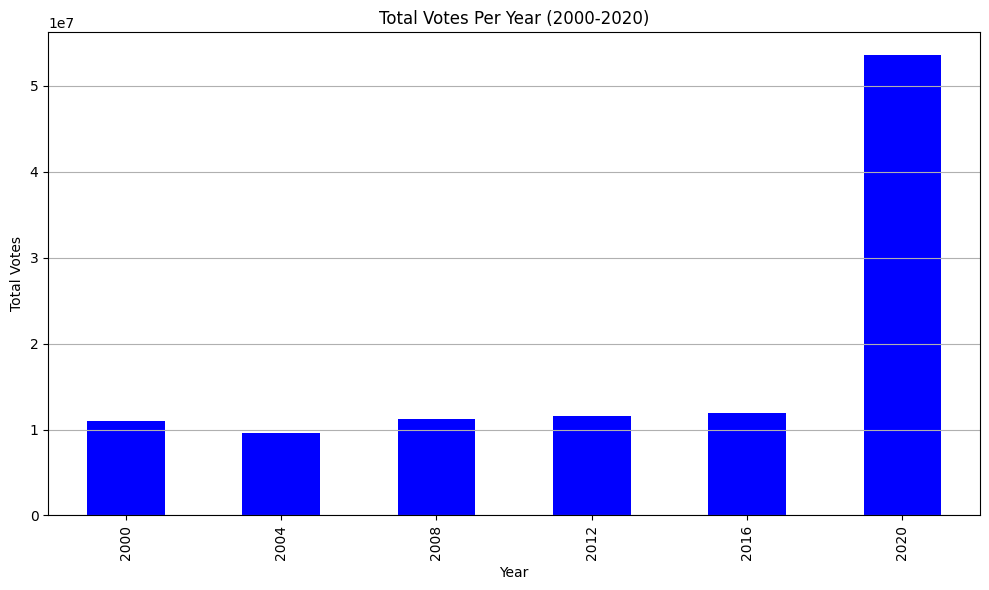

In [29]:
# creating a bar plot to help visualize the changing in voting population overtime before considering other trends

total_votes_per_year = vdf.groupby('year')['totalvotes'].sum()
# Plotting the results
plt.figure(figsize=(10, 6))
total_votes_per_year.plot(kind='bar', color='blue')

# Adding labels and title
plt.title('Total Votes Per Year (2000-2020)')
plt.xlabel('Year')
plt.ylabel('Total Votes')

# Display the plot
plt.grid(axis='y')
plt.tight_layout()
plt.show()

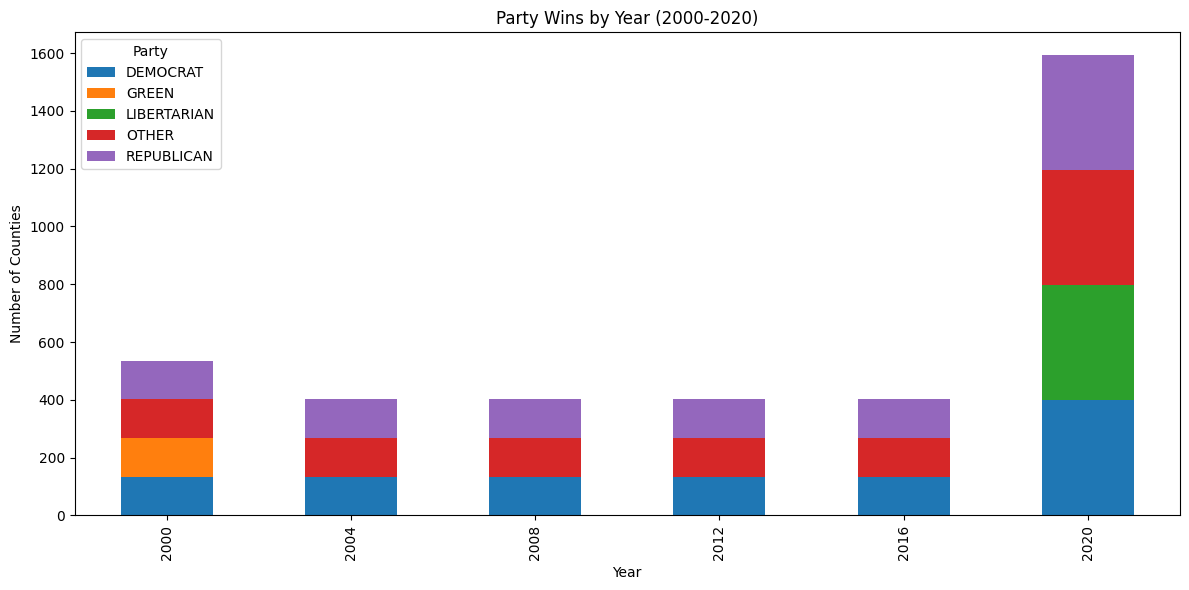

In [30]:
# Grouping the data by 'Year' and 'Party' and counting the number of occurrences
yearly_party_counts = vdf.groupby(['year', 'party']).size().reset_index(name='Count')

# Pivot the table to have parties as columns and years as rows
yearly_party_table = yearly_party_counts.pivot(index='year', columns='party', values='Count')

# Fill NaN values with 0 (if a party didn't win any counties in a particular year)
yearly_party_table = yearly_party_table.fillna(0)

# Plotting the results
yearly_party_table.plot(kind='bar', stacked=True, figsize=(12, 6))


# Adding labels and title
plt.title('Party Wins by Year (2000-2020)')
plt.xlabel('Year')
plt.ylabel('Number of Counties')
plt.legend(title='Party')

# Display the plot
plt.tight_layout()
plt.show()

In [31]:
# interesting to see the change in parties over time, such as the single occurances of  GREEN and LIBERTARIAN, and how they weigh into the votes

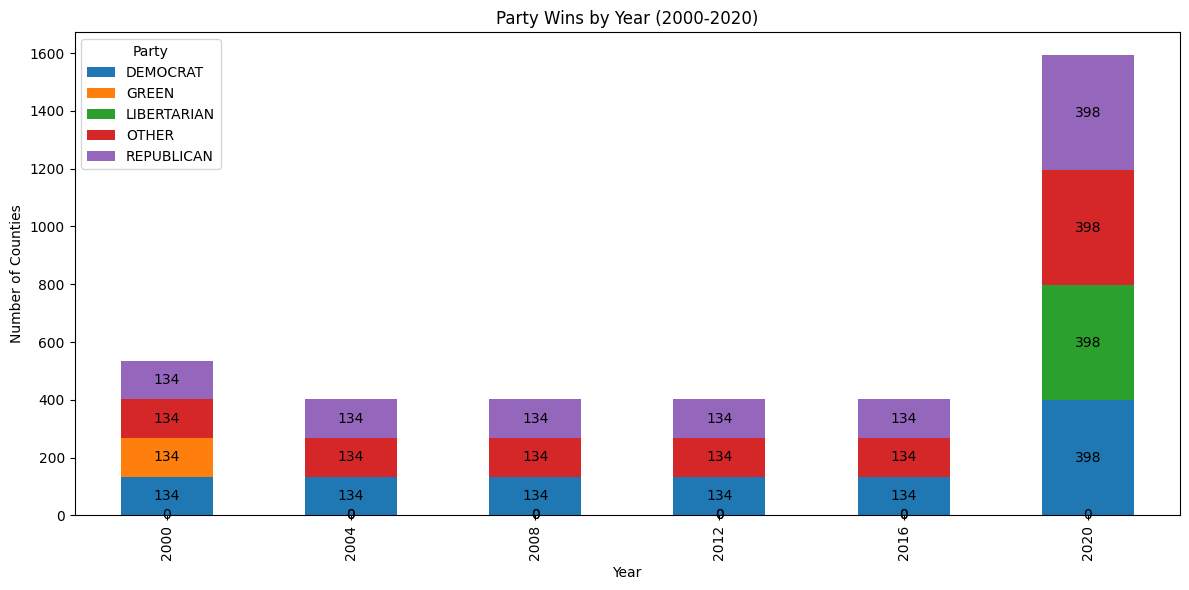

In [32]:
# Doing the same as above but adding numerical values to these weights

# Plotting the results
ax = yearly_party_table.plot(kind='bar', stacked=True, figsize=(12, 6))

# Adding labels and title
plt.title('Party Wins by Year (2000-2020)')
plt.xlabel('Year')
plt.ylabel('Number of Counties')
plt.legend(title='Party')

# Adding proportion values to the bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.0f}', (x + width / 2, y + height / 2), ha='center', va='center')

# Display the plot
plt.tight_layout()
plt.show()


In [33]:
# looking at the percentage of votes the winning candidate in each county had to see how close the race was

import pandas as pd


# Group the data by county name and calculate the total votes for each county
county_total_votes = vdf.groupby('county_name')['totalvotes'].sum()

# Within each county group, find the winning candidate and calculate the percentage of total votes they received
def calculate_percentage(group):
    max_votes = group['candidatevotes'].max()
    total_votes = group['totalvotes'].iloc[0]  # Total votes for the county
    return (max_votes / total_votes) * 100

winning_candidate_percentage = vdf.groupby('county_name').apply(calculate_percentage)

# Construct a DataFrame with the county name and the percentage of votes for the winning candidate in each county
winning_candidate_percentage_df = pd.DataFrame(winning_candidate_percentage, columns=['Winning Candidate Percentage'])

# Display the resulting DataFrame
print(winning_candidate_percentage_df)

                 Winning Candidate Percentage
county_name                                  
ACCOMACK                            71.974843
ALBEMARLE                           90.690984
ALEXANDRIA                         103.701154
ALEXANDRIA CITY                     67.788805
ALLEGHANY                           95.139567
...                                       ...
WINCHESTER                          66.992138
WINCHESTER CITY                     42.045736
WISE                                90.803907
WYTHE                               98.249389
YORK                                82.186877

[167 rows x 1 columns]


### Random Forest Model -- Main Variables

We decided to use a random forest for our prediction model, since it is generally more robust and accurate than a single decision tree.

In [34]:
! git clone https://github.com/amolaka/DS-3001---Voting-Project

fatal: destination path 'DS-3001---Voting-Project' already exists and is not an empty directory.


In [35]:
# Import libraries and packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
# Import data
data = pd.read_csv('/content/DS-3001---Voting-Project/clean_data/voting_data_with_population-2.csv')
data = data.drop(['Unnamed: 0'], axis=1)
data.head()

,year,state,county_fips,county_name,democrat_votes,republican_votes,total_votes,population
0,2000,VIRGINIA,51001,ACCOMACK,5092,6352,11444,38305.0
1,2000,VIRGINIA,51003,ALBEMARLE,16255,18291,34546,79236.0
2,2000,VIRGINIA,51005,ALLEGHANY,2214,2808,5022,12926.0
3,2000,VIRGINIA,51007,AMELIA,1754,2947,4701,11400.0
4,2000,VIRGINIA,51009,AMHERST,4812,6660,11472,31894.0


In [37]:
data = data.dropna()

In [38]:
train_data = data[data['year'] != 2020]
test_data = data[data['year'] == 2020]

county_names = data[data['year'] == 2020]
county_names = county_names.drop(columns = ['democrat_votes', 'republican_votes', 'year'])

train_data = train_data.drop(columns = ['state', 'county_name'])
test_data = test_data.drop(columns = ['state', 'county_name'])

# Split data into train/test:
X_train = train_data.drop(columns = ['democrat_votes', 'republican_votes'])
y_train = train_data.loc[:, ['democrat_votes', 'republican_votes']]
X_test = test_data.drop(columns = ['democrat_votes', 'republican_votes'])
y_test = test_data.loc[:, ['democrat_votes', 'republican_votes']]

In [39]:
# Look at the train and test data, as well as county names
train_data.head()

,year,county_fips,democrat_votes,republican_votes,total_votes,population
0,2000,51001,5092,6352,11444,38305.0
1,2000,51003,16255,18291,34546,79236.0
2,2000,51005,2214,2808,5022,12926.0
3,2000,51007,1754,2947,4701,11400.0
4,2000,51009,4812,6660,11472,31894.0


In [40]:
test_data.head()

,year,county_fips,democrat_votes,republican_votes,total_votes,population
670,2020,51001,7578,9172,16750,32673.0
671,2020,51003,42466,20804,63270,107405.0
672,2020,51005,2243,5859,8102,15157.0
673,2020,51007,2411,5390,7801,12953.0
674,2020,51009,5672,11041,16713,31775.0


In [41]:
county_names.head()

,state,county_fips,county_name,total_votes,population
670,VIRGINIA,51001,ACCOMACK,16750,32673.0
671,VIRGINIA,51003,ALBEMARLE,63270,107405.0
672,VIRGINIA,51005,ALLEGHANY,8102,15157.0
673,VIRGINIA,51007,AMELIA,7801,12953.0
674,VIRGINIA,51009,AMHERST,16713,31775.0


In [42]:
from sklearn.ensemble import RandomForestRegressor

# Fit model:
model = RandomForestRegressor() # Build a random forest model
model.fit(X_train,y_train) # Fit the model

RandomForestRegressor()

In [43]:
# Look at R-squared values
train_data_score = model.score(X_train, y_train)
print(f'R^2 - Train: {train_data_score:.4f}')

test_data_score = model.score(X_test, y_test)
print(f'R^2 - Test: {test_data_score:.4f}')

R^2 - Train: 0.9960
R^2 - Test: 0.9426


In [44]:
# Look at predicted voting data
prediction = model.predict(X_test) # Model predictions

# Make a new datafarme
voting_predictions = pd.DataFrame()
voting_predictions['county_name'] = county_names['county_name']
voting_predictions['county_fips'] = county_names['county_fips']
voting_predictions['democrat_votes'] = prediction[:, 0]
voting_predictions['republican_votes'] = prediction[:, 1]

# Look at new dataframe
voting_predictions

,county_name,county_fips,democrat_votes,republican_votes
670,ACCOMACK,51001,6322.03,10267.29
671,ALBEMARLE,51003,34863.00,26870.94
672,ALLEGHANY,51005,3262.41,4780.88
673,AMELIA,51007,2964.98,4760.03
674,AMHERST,51009,6295.42,10028.07
...,...,...,...,...
798,SUFFOLK CITY,51800,24960.18,20530.18
799,VIRGINIA BEACH CITY,51810,96186.04,95942.88
800,WAYNESBORO CITY,51820,5233.98,5148.50
801,WILLIAMSBURG CITY,51830,4047.83,2937.34


In [45]:
# Look at total democrat vs total republican votes
print("Total Democrat Votes: " + str(voting_predictions['democrat_votes'].sum()))
print("Total Republican Votes: " + str(voting_predictions['republican_votes'].sum()))

Total Democrat Votes: 2138675.4400000004
Total Republican Votes: 1999030.35


The Random Forest model used for prediction was run several times, outside of this report. Each time, our R-squared for the model was around 0.94, indicating that it fits the data well. Additionally, we observed more Democrat Votes overall than Republican Votes each time we ran the model.

### Random Forest Model -- Added Variables of Interest

Now, we are seeing if variables like age, education, income, and race have any impact on the predictability of our model.

In [46]:
# Import data
data2 = pd.read_csv('/content/DS-3001---Voting-Project/clean_data/full_combined_data-3.csv')
data2 = data2.drop(['Unnamed: 0'], axis=1)
data2

,year,state,county_fips,county_name,democrat_votes,republican_votes,total_votes,population,White alone,Black or African American alone,...,Male: Some early_log,Male: High school_log,Male: Some college or Associate's degree_log,Male: Bachelor's degree_log,Male: Master's degree or higher_log,Female: Some early_log,Female: High school_log,Female: Some college or Associate's degree_log,Female: Bachelor's degree_log,Female: Master's degree or higher_log
0,2000,VIRGINIA,51001,ACCOMACK,5092,6352,11444,38305.0,394.0,84.0,...,6.086775,6.814543,6.274762,5.411646,5.786897,5.762051,6.833032,6.419995,5.537334,5.710427
1,2000,VIRGINIA,51003,ALBEMARLE,16255,18291,34546,79236.0,509.0,328.0,...,6.523562,6.971669,6.626718,6.342121,6.838405,6.313548,6.967909,6.938284,6.395262,6.837333
2,2000,VIRGINIA,51005,ALLEGHANY,2214,2808,5022,12926.0,75.0,113.0,...,5.579730,6.148468,5.846439,4.890349,4.779123,5.293305,6.253829,5.942799,5.036953,5.627621
3,2000,VIRGINIA,51007,AMELIA,1754,2947,4701,11400.0,152.0,212.0,...,5.796058,6.326149,5.877736,4.976734,5.187386,4.997212,6.364751,6.049733,4.927254,5.863631
4,2000,VIRGINIA,51009,AMHERST,4812,6660,11472,31894.0,323.0,162.0,...,6.016157,6.699500,6.304449,5.117994,5.370638,6.284134,6.689599,6.298949,5.365976,5.583496
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
798,2020,VIRGINIA,51800,SUFFOLK CITY,28676,20082,48758,90093.0,320.0,721.0,...,6.102559,NaN,7.006695,6.091310,6.381816,6.198479,NaN,7.224025,6.349139,6.504288
799,2020,VIRGINIA,51810,VIRGINIA BEACH CITY,117393,105087,222480,450201.0,1288.0,1323.0,...,6.549651,NaN,8.020928,7.108244,7.296413,6.770789,NaN,7.998671,7.244942,7.540090
800,2020,VIRGINIA,51820,WAYNESBORO CITY,4961,5507,10468,22140.0,251.0,328.0,...,5.872118,NaN,6.338594,5.652489,5.894403,6.025866,NaN,6.572283,5.509388,6.059123
801,2020,VIRGINIA,51830,WILLIAMSBURG CITY,4790,1963,6753,14927.0,236.0,162.0,...,5.081404,NaN,5.587249,5.262690,5.613128,4.859812,NaN,6.182085,5.049856,5.736572


In [47]:
data2 = data2.dropna()
data2

,year,state,county_fips,county_name,democrat_votes,republican_votes,total_votes,population,White alone,Black or African American alone,...,Male: Some early_log,Male: High school_log,Male: Some college or Associate's degree_log,Male: Bachelor's degree_log,Male: Master's degree or higher_log,Female: Some early_log,Female: High school_log,Female: Some college or Associate's degree_log,Female: Bachelor's degree_log,Female: Master's degree or higher_log
0,2000,VIRGINIA,51001,ACCOMACK,5092,6352,11444,38305.0,394.0,84.0,...,6.086775,6.814543,6.274762,5.411646,5.786897,5.762051,6.833032,6.419995,5.537334,5.710427
1,2000,VIRGINIA,51003,ALBEMARLE,16255,18291,34546,79236.0,509.0,328.0,...,6.523562,6.971669,6.626718,6.342121,6.838405,6.313548,6.967909,6.938284,6.395262,6.837333
2,2000,VIRGINIA,51005,ALLEGHANY,2214,2808,5022,12926.0,75.0,113.0,...,5.579730,6.148468,5.846439,4.890349,4.779123,5.293305,6.253829,5.942799,5.036953,5.627621
3,2000,VIRGINIA,51007,AMELIA,1754,2947,4701,11400.0,152.0,212.0,...,5.796058,6.326149,5.877736,4.976734,5.187386,4.997212,6.364751,6.049733,4.927254,5.863631
4,2000,VIRGINIA,51009,AMHERST,4812,6660,11472,31894.0,323.0,162.0,...,6.016157,6.699500,6.304449,5.117994,5.370638,6.284134,6.689599,6.298949,5.365976,5.583496
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,2004,VIRGINIA,51515,BEDFORD,1042,1472,2514,6299.0,176.0,201.0,...,6.047372,7.080868,6.752270,5.958425,6.093570,5.926926,7.004882,6.807935,5.846439,6.028279
239,2004,VIRGINIA,51600,FAIRFAX,5395,5045,10440,21498.0,3057.0,1025.0,...,7.678326,8.178639,7.990915,7.467942,8.152774,7.583756,8.137103,8.072467,7.604396,8.029433
241,2004,VIRGINIA,51620,FRANKLIN,1910,1613,3523,8346.0,148.0,168.0,...,6.309918,7.079184,6.720220,5.598422,5.840642,6.013715,6.896694,6.720220,5.749393,5.932245
259,2004,VIRGINIA,51760,RICHMOND,52167,21637,73804,197790.0,99.0,104.0,...,5.393628,6.733402,5.697093,4.499810,4.624973,5.087596,5.908083,5.686975,4.553877,5.204007


In [48]:
data2['year'].unique()

array([2000, 2004])

Unfortunately, most of the data had NA's. While we have previously stated that we wanted to use the 2020 data to test the model and previous years to train the model, we are only left with two years when we add these additional variables of interest -- 2000 and 2004. However, this could be interesting! Let's still run a prediction model using 2000 data to train and 2004 data to test.

In [49]:
train_data = data2[data2['year'] == 2000]
test_data = data2[data2['year'] == 2004]

county_names = data2[data2['year'] == 2004][['county_name']]

train_data = train_data.drop(columns = ['state', 'county_name'])
test_data = test_data.drop(columns = ['state', 'county_name'])

# Split data into train/test:
X_train = train_data.drop(columns = ['democrat_votes', 'republican_votes'])
y_train = train_data.loc[:, ['democrat_votes', 'republican_votes']]
X_test = test_data.drop(columns = ['democrat_votes', 'republican_votes'])
y_test = test_data.loc[:, ['democrat_votes', 'republican_votes']]

In [50]:
train_data.head()

,year,county_fips,democrat_votes,republican_votes,total_votes,population,White alone,Black or African American alone,American Indian and Alaska Native alone,Asian alone,...,Male: Some early_log,Male: High school_log,Male: Some college or Associate's degree_log,Male: Bachelor's degree_log,Male: Master's degree or higher_log,Female: Some early_log,Female: High school_log,Female: Some college or Associate's degree_log,Female: Bachelor's degree_log,Female: Master's degree or higher_log
0,2000,51001,5092,6352,11444,38305.0,394.0,84.0,32.0,44.0,...,6.086775,6.814543,6.274762,5.411646,5.786897,5.762051,6.833032,6.419995,5.537334,5.710427
1,2000,51003,16255,18291,34546,79236.0,509.0,328.0,140.0,223.0,...,6.523562,6.971669,6.626718,6.342121,6.838405,6.313548,6.967909,6.938284,6.395262,6.837333
2,2000,51005,2214,2808,5022,12926.0,75.0,113.0,5.0,70.0,...,5.579730,6.148468,5.846439,4.890349,4.779123,5.293305,6.253829,5.942799,5.036953,5.627621
3,2000,51007,1754,2947,4701,11400.0,152.0,212.0,38.0,53.0,...,5.796058,6.326149,5.877736,4.976734,5.187386,4.997212,6.364751,6.049733,4.927254,5.863631
4,2000,51009,4812,6660,11472,31894.0,323.0,162.0,85.0,51.0,...,6.016157,6.699500,6.304449,5.117994,5.370638,6.284134,6.689599,6.298949,5.365976,5.583496


In [51]:
test_data.head()

,year,county_fips,democrat_votes,republican_votes,total_votes,population,White alone,Black or African American alone,American Indian and Alaska Native alone,Asian alone,...,Male: Some early_log,Male: High school_log,Male: Some college or Associate's degree_log,Male: Bachelor's degree_log,Male: Master's degree or higher_log,Female: Some early_log,Female: High school_log,Female: Some college or Associate's degree_log,Female: Bachelor's degree_log,Female: Master's degree or higher_log
134,2004,51001,5518,7726,13244,38305.0,394.0,84.0,32.0,44.0,...,6.086775,6.814543,6.274762,5.411646,5.786897,5.762051,6.833032,6.419995,5.537334,5.710427
135,2004,51003,22088,21189,43277,79236.0,509.0,328.0,140.0,223.0,...,6.523562,6.971669,6.626718,6.342121,6.838405,6.313548,6.967909,6.938284,6.395262,6.837333
136,2004,51005,3203,3962,7165,12926.0,75.0,113.0,5.0,70.0,...,5.579730,6.148468,5.846439,4.890349,4.779123,5.293305,6.253829,5.942799,5.036953,5.627621
137,2004,51007,1862,3499,5361,11400.0,152.0,212.0,38.0,53.0,...,5.796058,6.326149,5.877736,4.976734,5.187386,4.997212,6.364751,6.049733,4.927254,5.863631
138,2004,51009,4866,7758,12624,31894.0,323.0,162.0,85.0,51.0,...,6.016157,6.699500,6.304449,5.117994,5.370638,6.284134,6.689599,6.298949,5.365976,5.583496


In [52]:
from sklearn.ensemble import RandomForestRegressor

# Fit model:
model = RandomForestRegressor() # Build a random forest model
model.fit(X_train,y_train) # Fit the model

RandomForestRegressor()

In [53]:
# Look at R-squared values
train_data_score = model.score(X_train, y_train)
print(f'R^2 - Train: {train_data_score:.4f}')

test_data_score = model.score(X_test, y_test)
print(f'R^2 - Test: {test_data_score:.4f}')

R^2 - Train: 0.8754
R^2 - Test: 0.8127


In [54]:
# Look at predicted voting data
prediction = model.predict(X_test) # Model predictions

# Make a new datafarme
voting_predictions = pd.DataFrame()
voting_predictions['county_name'] = county_names['county_name']
voting_predictions['county_fips'] = data2['county_fips']
voting_predictions['democrat_votes'] = prediction[:, 0]
voting_predictions['republican_votes'] = prediction[:, 1]

# Look at new dataframe
voting_predictions

,county_name,county_fips,democrat_votes,republican_votes
134,ACCOMACK,51001,5116.37,8142.00
135,ALBEMARLE,51003,15554.02,22166.40
136,ALLEGHANY,51005,2818.32,3804.84
137,AMELIA,51007,2077.57,3391.97
138,AMHERST,51009,5218.18,7221.99
...,...,...,...,...
230,BEDFORD,51515,1193.72,1546.34
239,FAIRFAX,51600,34641.43,36492.88
241,FRANKLIN,51620,1640.12,1643.53
259,RICHMOND,51760,38622.27,24766.05


In [55]:
# Look at total democrat vs total republican votes
print("Total Democrat Votes: " + str(voting_predictions['democrat_votes'].sum()))
print("Total Republican Votes: " + str(voting_predictions['republican_votes'].sum()))

Total Democrat Votes: 852105.6200000001
Total Republican Votes: 1128556.19


### Presentation of Main Results: Chloropleth Maps

In [56]:
pip install --upgrade pip


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 17.6 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2


In [59]:
pip install mapclassify

In [57]:
pip install --upgrade geopandas fiona gdal


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 802.6/802.6 kB 13.1 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [64]:
import geopandas as gpd
import mapclassify
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Load data
gdf = gpd.read_file('./VirginiaCounty_ClippedToShoreline.shx') # Load Virginia shapefile for maps
vdf = pd.read_csv('./voting_predictions.csv') # Load historical voting data
cdf = pd.read_csv('./county_adjacencies (1).csv') # Load county adjacency data and population data

# Merge shapefile data and county adjacency data:
gdf['FIPS_left'] = pd.to_numeric(gdf['STCOFIPS'])
df = gdf.merge(cdf,left_on='FIPS_left',right_on='FIPS')  # merge county population and adjacency data into df
del gdf, cdf

ERROR:fiona._env:Unable to open ./VirginiaCounty_ClippedToShoreline.shp or ./VirginiaCounty_ClippedToShoreline.SHP.


DriverError: Unable to open ./VirginiaCounty_ClippedToShoreline.shp or ./VirginiaCounty_ClippedToShoreline.SHP.

In [ ]:
# Population Data

fig = plt.figure()
ax = fig.add_axes([0, 0, 2, 2])
divider = make_axes_locatable(ax)
ax.axis('off')
cax = divider.append_axes("right", size="2%", pad=0.08)
df.plot(ax=ax,column='Population2022',legend=True,cax=cax)

**DISCLAIMER**: I apologize the graphs look weird here, they did not have this issue in the original file. All attempts to debug this failed, but the complete maps can be clearly seen in our 'Chloropleth_Maps' file on the Github Repository

In [ ]:
# looking at raw data
fig = plt.figure()
ax = fig.add_axes([0, 0, 2, 2])
divider = make_axes_locatable(ax)
ax.axis('off')
cax = divider.append_axes("right", size="2%", pad=0.08)
vdf.plot(ax=ax,column='democrat_votes',legend=True)

In [ ]:
# Difference in Dem and Rep votes:


df['vote_diff'] = vdf['republican_votes']-vdf['democrat_votes']

fig = plt.figure()
ax = fig.add_axes([0, 0, 2, 2])
divider = make_axes_locatable(ax)
ax.axis('off')
cax = divider.append_axes("right", size="2%", pad=0.08)
df.plot(ax=ax,column='vote_diff',legend=True,cax=cax,cmap='bwr',edgecolor='k')

In [ ]:
df['vote_diff'] = vdf['republican_votes']-vdf['democrat_votes']

fig = plt.figure()
ax = fig.add_axes([0, 0, 2, 2])
divider = make_axes_locatable(ax)
ax.axis('off')
cax = divider.append_axes("right", size="2%", pad=0.08)
df.plot(ax=ax,column='vote_diff',legend=True,cax=cax,edgecolor='w')

In [ ]:
df['vote_diff'] = vdf['republican_votes']-vdf['democrat_votes']

fig = plt.figure()
ax = fig.add_axes([0, 0, 2, 2])
divider = make_axes_locatable(ax)
ax.axis('off')
#cax = divider.append_axes("right", size="2%", pad=0.08)
df.plot(ax=ax,column='vote_diff',legend=True,cmap='bwr',edgecolor='k',scheme='Quantiles',k=7)

In [ ]:
# taking the inverse hyperbolic sine of the difference to resolve some of the "long tail" issues:
df['vote_diff_ihs'] = np.arcsinh(df['vote_diff'])

fig = plt.figure()
ax = fig.add_axes([0, 0, 2, 2])
divider = make_axes_locatable(ax)
ax.axis('off')
cax = divider.append_axes("right", size="2%", pad=0.08)
df.plot(ax=ax,column='vote_diff_ihs',legend=True,cax=cax,cmap='bwr',edgecolor='k')

## **Conclusion**
In this project, we attempted to predict the winner of the 2024 presidential election in the state of Virginia. The data used for this project included historical Virginia voting data from the years 2000-2020, NHGIS county data, and population data from each county to generate a predictive model. Additionally, county adjacencies data was used to visually present and compare our predicted results against actual election outcomes for the year 2020, since we have access to that data and the candidates running are the same. Our methodology consisted of data cleaning, preprocessing, exploratory data analysis, and model development to ensure the accuracy and reliability of our predictions.

Data cleaning and preprocessing took up the majority of our efforts. We addressed challenges such as missing values, outlier detection, and data type inconsistencies, ensuring that our model was built upon a clean, yet informative dataset. Our greatest challenge at this step came from combining a variety of separate data frames that each consisted of data we wanted to analyze, with difficulties like renaming columns and iterating through one dataset to concatenate it to the other.

We had set out to focus on including relevant demographic and economic variables such as income, education, age, and race, in hopes that it would allow us to capture some important socio-political dynamics influencing electoral outcomes in Virginia. However, we experienced several issues with the data. Mainly, much of the data had missing values, so we had to drop the most recent -- and what probably would have been the most accurate -- data. However, we decided to still go ahead and use this data to see how it would impact our model.

A random forest model proved to be apt for our task, offering a balance between interpretability and predictive performance. The main model was trained on data from the year 2000 to 2019, and then tested on the 2020 data, which featured some of the same candidates as the anticipated 2024 election. The high R-squared value of 0.9458 indicates a strong fit of the model to the training data, bolstering confidence in its predictive capabilities.

The model with the additional variables of interest was trained on data from the year 2000, and tested on data from the year 2004. Although this data did not feature the same candidates as the anticipated 2024 election, it still allowed to see the impact of variables like age, income, education, and race on the number of republican and democrat votes. Our R-squared value here was slightly lower, at 0.8217, but still indicated a strong fit of the model to the training data. However, it is interesting to note that this model predicted that there would be more republican votes than democratic votes. This may have been true of previous years, and it is definitely a possibility for the upcoming election.

Without a doubt, there are limitations to our approach, including the idea of relying on past election data to predict future outcomes. This limitation stems from the fact that electoral dynamics may evolve over time due to shifting demographics, changing political landscapes, and unforeseen events. We also had many missing values in the data used for our approach, so finding a more accurate, up-to-date dataset would have strengthened our model. Our model's ability to adapt to changes can be enhanced through continuous updates and refinement on the included demographic variables. Combining our main model with our second model -- assuming that we can find up-to-date data for the years in which we had missing values -- would be the next approach to future work.

While it is true that electoral dynamics may evolve over time due to shifting demographics, changing political landscapes, and unforeseen events, our model has the ability to adapt to these changes. Not only does it introduce randomness into the analysis, taking into account the possibility of these changes, but we can also add any additional variables to our model that may arise in the future. Additionally, the inclusion of county adjacencies data enriched our analysis by capturing spatial dependencies. In this way, the chloropleth maps we made helped to visualize the predictive changes of political viewpoints in a geographical context of Virginia. In comparison to the 2020 election results, the chloropleths maps from the predictive model were similar, but slightly more democratic leaning, as a couple more counties were blue in the midsts of majortively red surrounding areas.

In regards to this project's opportunity for future expansion and research, one potential avenue is to incorporate additional datasets. Data from the entire country, not just the state of Virginia, could help further strengthen this model. On a deeper level, a wider set of data including socio-economic indicators, political sentiment analysis from social media, or local political events, could further uncover predictive trends on a more county focused level. Additionally, different predictive model methods could be tested and compared against this random forest approach.

